# FLIP (05) Learning Theory (II)

---
Team Director: Ye Lei | ylei@tulip.academy<br />

TULIP Academy <br />
http://www.tulip.academy

---

## Gaussian Processes for Dummies

 ![](figures/gp01.png)

Gaussian Processes (GPs) are the natural next step in that journey as they provide an alternative approach to regression problems. This post aims to present the essentials of GPs without going too far down the various rabbit holes into which they can lead you (e.g. understanding how to get the square root of a matrix.)

Recall that in the simple linear regression setting, we have a dependent variable y that we assume can be modeled as a function of an independent variable x, i.e. 
$y=f(x)+ϵ $(where$ ϵ $is the irreducible error) but we assume further that the function $ f $defines a linear relationship and so we are trying to find the parameters 
$θ_0 $and $θ_1 $which define the intercept and slope of the line respectively, i.e. 
$y=θ_0+θ_1x+ϵ $. Bayesian linear regression provides a probabilistic approach to this by finding a distribution over the parameters that gets updated whenever new data points are observed. The GP approach, in contrast, is a non-parametric approach, in that it finds a distribution over the possible functions 
$f(x)f(x)$ that are consistent with the observed data. As with all Bayesian methods it begins with a prior distribution and updates this as data points are observed, producing the posterior distribution over functions.

 ![](figures/gp02.jpg)

To get an intuition about what this even means, think of the simple OLS line defined by an intercept and slope that does its best to fit your data.

 ![](figures/gp03.png)

The problem is, this line simply isn’t adequate to the task, is it? You’d really like a curved line: instead of just 2 parameters $\theta_0$ and $\theta_1 $for the function 
$ \hat y =\theta_0+\theta_1x $it looks like a quadratic function would do the trick, i.e. 
$ \hat y=\theta_0+\theta_1x+\theta_2x^2 $. Now we’d need to learn $ 3 $ parameters. But what if we don’t want to specify upfront how many parameters are involved? We’d like to consider every possible function that matches our data, with however many parameters are involved. That’s what non-parametric means: it’s not that there aren’t parameters, it’s that there are infinitely many parameters.

But of course we need a prior before we’ve seen any data. What might that look like? Well, we don’t really want ALL THE FUNCTIONS, that would be nuts. So let’s put some constraints on it. First of all, we’re only interested in a specific domain — let’s say our x values only go from -5 to 5. Now we can say that within that domain we’d like to sample functions that produce an output whose mean is, say, 0 and that are not _too wiggly_. Here’s an example of a very wiggly function:
![](figures/gp04.png)

And here’s a much smoother function:
![](figures/gp05.png)

There’s a way to specify that smoothness: we use a __**covariance matrix**__ to ensure that values that are close together in input space will produce output values that are close together. This covariance matrix, along with a mean function to output the expected value of $f(x)$ defines a Gaussian Process.

Here’s how Kevin Murphy explains it in the excellent  
textbook <font color=blue > MachineLearning：A Probabilistic Perspective </font> : 

<font color=gray >A GP defines a prior over functions, which can be converted into a posterior over functions once we have seen some data. Although it might seem difficult to represent a distrubtion over a function, it turns out that we only need to be able to define a distribution over the function’s values at a finite, but arbitrary, set of points, say 
<font color=red > $x_1,…,x_N$ </font>. A GP assumes that 
<font color=red > $p(f(x_1),…,f(x_N))$ </font> is jointly Gaussian, with some mean 
$μ(x)$ and covariance 
$\sum(x)$given by 
$\sum_{ij}=k(x_i,x_j)$, where k is a positive definite kernel function. The key idea is that if 
<font color=red > $x_i$ </font> and 
<font color=red > $x_j$ </font> are deemed by the kernel to be similar, then we expect the output of the function at those points to be similar, too.</font>

The mathematical crux of GPs is the multivariate Gaussian distribution.
![](figures/gp06.png)

It’s easiest to imagine the bivariate case, pictured here. The shape of the bell is determined by the covariance matrix. If we imagine looking at the bell from above and we see a perfect circle, this means these are two independent normally distributed variables — their covariance is 0. If we assume a variance of 1 for each of the independent variables, then we get a covariance matrix of $  \Sigma = 
     \left[
     \begin{matrix}
       1 & 0 \\
       0 & 1  
      \end{matrix}
      \right] 
    $. The diagonal will simply hold the variance of each variable on its own, in this case both 1’s. Anything other than 0 in the top right would be mirrored in the bottom left and would indicate a correlation between the variables. This would give the bell a more oval shape when looking at it from above.

If we have the joint probability of variables$ x_1 $ and $ x_2 $ as follows:  

<center>
$\begin{pmatrix}
x_1 \\
x_2
\end{pmatrix}$$\sim \mathcal{N}$${\left(
\begin{pmatrix}
\mu_1 \\
\mu_2
\end{pmatrix},
\begin{pmatrix}
\sigma_{11} & \sigma_{12}\\
\sigma_{21} & \sigma_{22}\\
\end{pmatrix}
\right)}$</center>   
it is possible to get the conditional probability of one of the variables given the other, and **this is how, in a GP, we can derive the posterior from the prior and our observations**. It’s just that we’re not just talking about the joint probability of two variables, as in the bivariate case, but the joint probability of the values of $f(x)$ for all the $x$ values we’re looking at, e.g. real numbers between $-5$ and $5$.
So, our posterior is the joint probability of our outcome values, some of which we have observed (denoted collectively by<font color=DarkRed> $f$ </font>) and some of which we haven’t (denoted collectively by<font color=DarkRed> $f^∗$ </font> ):  
<center>
$\begin{pmatrix}
f \\
f_{*}
\end{pmatrix}$$\sim \mathcal{N}$${\left(
\begin{pmatrix}
\mu \\
\mu_{*}
\end{pmatrix}
,
\begin{pmatrix}
K & K_{*}\\
K_{*}^T & K_{**}\\
\end{pmatrix}
\right)}$
</center>  
Here, <font color=DarkRed> $K$ </font> is the matrix we get by applying the kernel function to our observed <font color=DarkRed> $x$ </font> values, i.e. the similarity of each observed <font color=DarkRed> $x$ </font> to each other observed <font color=DarkRed> $x$ </font>.<font color=DarkRed> $K_*$ </font>gets us the similarity of the training values to the test values whose output values we’re trying to estimate.<font color=DarkRed> $K_{**}$ </font>gives the similarity of the test values to each other.

I’m well aware that things may be getting hard to follow at this point, so it’s worth reiterating what we’re actually trying to do here. There are some points<font color = Darkred> $x$</font> for which we have observed the outcome  <font color = Darkred> $f(x)$</font>(denoted above as simply <font color = Darkred> $f$</font>). There are some points <font color = Darkred> $x_*$</font> for which we would like to estimate <font color = Darkred> $f(x_*)$</font>(denoted above as<font color = Darkred> $f_*$</font>). So we are trying to get the probability distribution <font color = Darkred> $p(f_* \mid x_*,x,f)$</font>and we are assuming that 
<font color = Darkred> $f$</font> and <font color = Darkred> $f_*$</font> together are jointly Gaussian as defined above.

About 4 pages of matrix algebra can get us from the joint distribution <font color = Darkred> $p(f,f_*)$</font>to the conditional <font color = Darkred> $p(f_* \mid f)$</font>. I am conveniently going to skip past all that but if you’re interested in the gory details then the Kevin Murphy book is your friend. At any rate, what we end up with are the mean,<font color = Darkred> $\mu _*$</font>and covariance matrix <font color = Darkred> $\Sigma _*$</font>that define our distribution <font color = Darkred> $f_{*} \sim \mathcal{N}{\left(\mu_{*}, \Sigma_{*}\right)}$</font>
Now we can sample from this distribution. Recall that when you have a univariate distribution<font color = Darkred> $x \sim \mathcal{N}{\left(\mu, \sigma^2\right)}$</font>you can express this in relation to standard normals, i.e. as<font color = Darkred> $x \sim \mu + \sigma(\mathcal{N}{\left(0, 1\right)})$</font>. And generating standard normals is something any decent mathematical programming language can do (incidently, there’s a very neat trick involved whereby uniform random variables are projected on to the CDF of a normal distribution, but I digress…) We need the equivalent way to express our multivariate normal distribution in terms of standard normals:<font color = Darkred>$f_{*} \sim \mu + B\mathcal{N}{(0, I)} $</font>, where B is the matrix such that<font color = Darkred>$ BB^T = \Sigma_{*} $</font>, i.e. the square root of our covariance matrix. We can use something called a <font color = DeepSkyBlue> Cholesky decomposition</font> to find this.

OK, enough math — time for some code. The code presented here borrows heavily from two main sources: <font color = DeepSkyBlue> Nando de Freitas’ UBC Machine Learning lectures</font> (code for GPs can be found <font color = DeepSkyBlue> here</font>) and the <font color = DeepSkyBlue> PMTK3 toolkit</font>, which is the companion code to Kevin Murphy’s textbook <font color = DeepSkyBlue>Machine Learning: A Probabilistic Perspective</font>.

Below we define the points at which our functions will be evaluated, 50 evenly spaced points between -5 and 5. We also define the kernel function which uses the Squared Exponential, a.k.a Gaussian, a.k.a. Radial Basis Function kernel. It calculates the squared distance between points and converts it into a measure of similarity, controlled by a tuning parameter. Note that we are assuming a mean of 0 for our prior.

In [3]:
%matplotlib inline

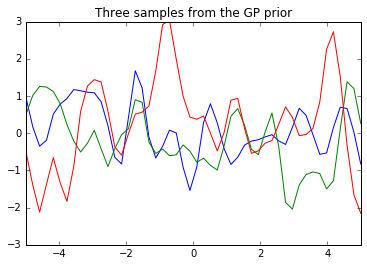

In [4]:
import numpy as np
import matplotlib.pyplot as pl

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
pl.plot(Xtest, f_prior)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP prior')
pl.show()

Note that the K_ss variable here corresponds to <font color = Darkred>$K_{∗∗}$</font>in the equation above for the joint probability. It will be used again below, along with<font color = Darkred>$K$</font>and<font color = Darkred>$K_∗$</font>  

Now we’ll observe some data. The actual function generating the <font color = Darkred>$y$</font> values from our<font color = Darkred>$x$</font>values, unbeknownst to our model, is the <font color = Darkred>$ \sin $</font> function. We generate the output at our 5 training points, do the equivalent of the above-mentioned 4 pages of matrix algebra in a few lines of python code, sample from the posterior and plot it.

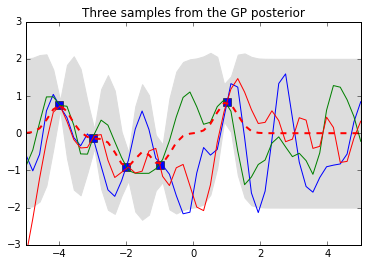

In [5]:
# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

pl.plot(Xtrain, ytrain, 'bs', ms=8)
pl.plot(Xtest, f_post)
pl.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
pl.plot(Xtest, mu, 'r--', lw=2)
pl.axis([-5, 5, -3, 3])
pl.title('Three samples from the GP posterior')
pl.show()

See how the training points (the blue squares) have “reined in” the set of possible functions: the ones we have sampled from the posterior all go through those points. The dotted red line shows the mean output and the grey area shows 2 standard deviations from the mean. Note that this is 0 at our training points (because we did not add any noise to our data). Also note how things start to go a bit wild again to the right of our last training point  <font color = Darkred>$ x = 1 $</font>  — that won’t get reined in until we observe some data over there.

This has been a very basic intro to Gaussian Processes — it aimed to keep things as simple as possible to illustrate the main idea and hopefully whet the appetite for a more extensive treatment of the topic such as can be found in the <font color = Deepskyblue> Rasmussen and Williams book </font>.